# **Calculate an NDVI in Python**
## Learn to calculate a vegetation index to assess the quality of vegetation within an area of interest

Based on:
* https://developers.planet.com/planetschool/calculate-an-ndvi-in-python/
* https://github.com/planetlabs/notebooks/blob/master/jupyter-notebooks/ndvi/ndvi_planetscope.ipynb

Normalized Difference Vegetation Index (NDVI), developed by a NASA scientist named Compton Tucker in 1977, is commonly used to assess whether an area contains live green vegetation or not. It can show the difference between water and plants, bare soil and grass, whether plants are under stress, and what lifecycle stage a crop is in.

It compares how much more near-infrared light is reflected by chlorophyll vs visible red light:


![ndvi-formula](https://developers.planet.com/planetschool/images/equation.png)

![veg-spectral-sign](http://gsp.humboldt.edu/OLM/Courses/GSP_216_Online/images/veg-reflect.PNG)


In this guide we will perform a basic NDVI calculation in python, using Planet's 4-Band imagery.

## Setting Up

In [1]:
!pip install rasterio
!pip install retrying

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import retrying
import requests
import numpy as np
from xml.dom import minidom

## Download a 4-Band image

In [6]:
!planet data download --item-type PSScene4Band --asset-type analytic,analytic_xml --string-in id 20161218_101700_0e0d

activating: 0            complete: 0              elapsed: 0                    
paging: False            pending: 0                                             

activating: 1            complete: 0              downloaded: 0.00MB            
downloading: 0           elapsed: 1               paging: True                  
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 0.00MB            
downloading: 0           elapsed: 2               paging: False                 
pending: 2                                                                      

activating: 0            complete: 0              downloaded: 0.00MB            
downloading: 0           elapsed: 2               paging: False                 
pending: 2                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be remov

activating: 0            complete: 0              downloaded: 13.67MB           
downloading: 2           elapsed: 15              paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
activating: 0            complete: 0              downloaded: 14.92MB           
downloading: 2           elapsed: 16              paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be re

activating: 0            complete: 0              downloaded: 33.63MB           
downloading: 2           elapsed: 31              paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
activating: 0            complete: 0              downloaded: 34.88MB           
downloading: 2           elapsed: 32              paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be re

activating: 0            complete: 0              downloaded: 53.59MB           
downloading: 2           elapsed: 47              paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
activating: 0            complete: 0              downloaded: 54.83MB           
downloading: 2           elapsed: 48              paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be re

activating: 0            complete: 0              downloaded: 73.18MB           
downloading: 2           elapsed: 63              paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
activating: 0            complete: 0              downloaded: 74.43MB           
downloading: 2           elapsed: 64              paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be re

activating: 0            complete: 0              downloaded: 93.04MB           
downloading: 2           elapsed: 79              paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
activating: 0            complete: 0              downloaded: 94.32MB           
downloading: 2           elapsed: 80              paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be re

activating: 0            complete: 0              downloaded: 112.77MB          
downloading: 2           elapsed: 95              paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
activating: 0            complete: 0              downloaded: 114.04MB          
downloading: 2           elapsed: 96              paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be re

activating: 0            complete: 0              downloaded: 132.75MB          
downloading: 2           elapsed: 111             paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
activating: 0            complete: 0              downloaded: 133.80MB          
downloading: 2           elapsed: 112             paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be re

activating: 0            complete: 0              downloaded: 152.41MB          
downloading: 2           elapsed: 127             paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
activating: 0            complete: 0              downloaded: 153.69MB          
downloading: 2           elapsed: 128             paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be re

activating: 0            complete: 0              downloaded: 172.04MB          
downloading: 2           elapsed: 143             paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
activating: 0            complete: 0              downloaded: 173.32MB          
downloading: 2           elapsed: 144             paging: False                 
pending: 0                                                                      
2020-06-02 10:46:28,177 - FuturesSession - WARNING - `background_callback` is
deprecated and will be removed in 1.0, use `hooks` instead
2020-06-02 10:46:28,677 - FuturesSession - WARNING - `background_callback` is
deprecated and will be re

In [7]:
!ls

20161218_101700_0e0d_3B_AnalyticMS_metadata.xml  env	     README.md
20161218_101700_0e0d_3B_AnalyticMS.tif		 ndvi.ipynb


## Extract the Visible Red and NIR bands

In [8]:
src = rasterio.open("20161218_101700_0e0d_3B_AnalyticMS.tif")

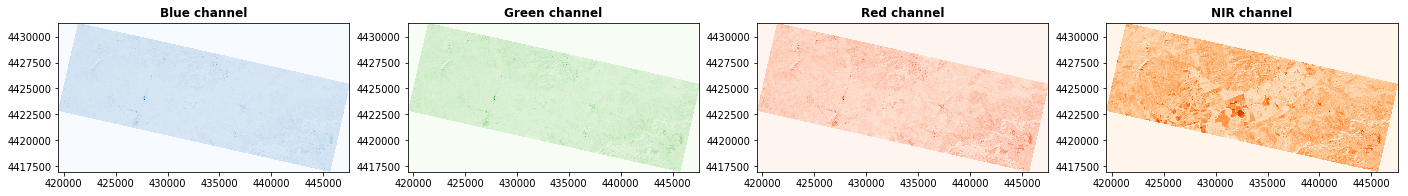

In [9]:
fig, (axb, axg, axr, axn) = plt.subplots(1,4, figsize=(24,8))
show((src, 1), ax=axb, cmap='Blues', title='Blue channel')
show((src, 2), ax=axg, cmap='Greens', title='Green channel')
show((src, 3), ax=axr, cmap='Reds', title='Red channel')
show((src, 4), ax=axn, cmap='Oranges', title='NIR channel')
plt.show()

In [12]:
# Load red and NIR bands - note all PlanetScope 4-band images have band order BGRN

band_red = src.read(3)
band_nir = src.read(4)

## Normalize to Top of Atmosphere Reflectance

In [13]:
xmldoc = minidom.parse("20161218_101700_0e0d_3B_AnalyticMS_metadata.xml")
nodes = xmldoc.getElementsByTagName("ps:bandSpecificMetadata")

# XML parser refers to bands by numbers 1-4
coeffs = {}
for node in nodes:
    bn = node.getElementsByTagName("ps:bandNumber")[0].firstChild.data
    if bn in ['1', '2', '3', '4']:
        i = int(bn)
        value = node.getElementsByTagName("ps:reflectanceCoefficient")[0].firstChild.data
        coeffs[i] = float(value)

In [14]:
# Multiply by corresponding coefficients
band_red = band_red * coeffs[3]
band_nir = band_nir * coeffs[4]

## Perform the NDVI calculation

In [15]:
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

In [16]:
# Set spatial characteristics of the output object to mirror the input
kwargs = src.meta
kwargs.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('ndvi.tif', 'w', **kwargs) as dst:
        dst.write_band(1, ndvi.astype(rasterio.float32))

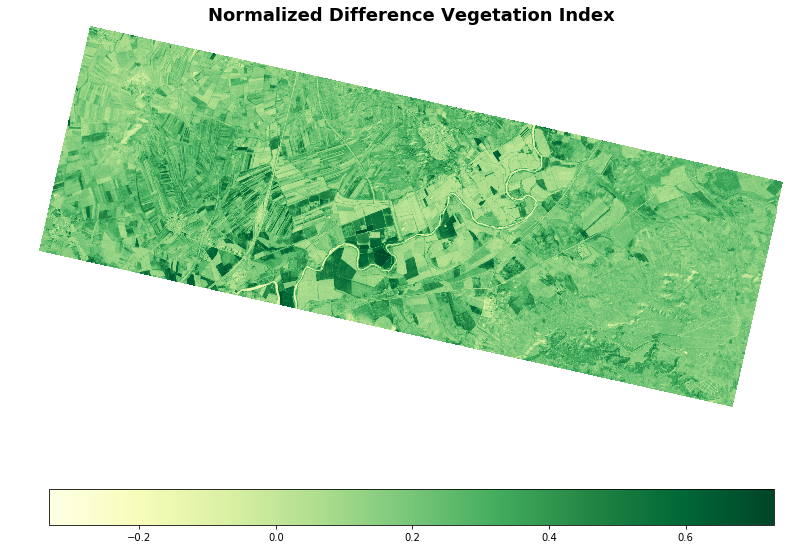

In [26]:
min=np.nanmin(ndvi)
max=np.nanmax(ndvi)
mid=0.1

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

cmap = plt.cm.YlGn 
cax = ax.imshow(ndvi, cmap=cmap, clim=(min, max), vmin=min, vmax=max)

ax.axis('off')
ax.set_title('Normalized Difference Vegetation Index', fontsize=18, fontweight='bold')

cbar = fig.colorbar(cax, orientation='horizontal', shrink=0.65)

plt.show()

## Save the NDVI image

In [17]:
plt.imsave("ndvi_cmap.png", ndvi, cmap=plt.cm.YlGn)

## Generate histogram of NDVI values

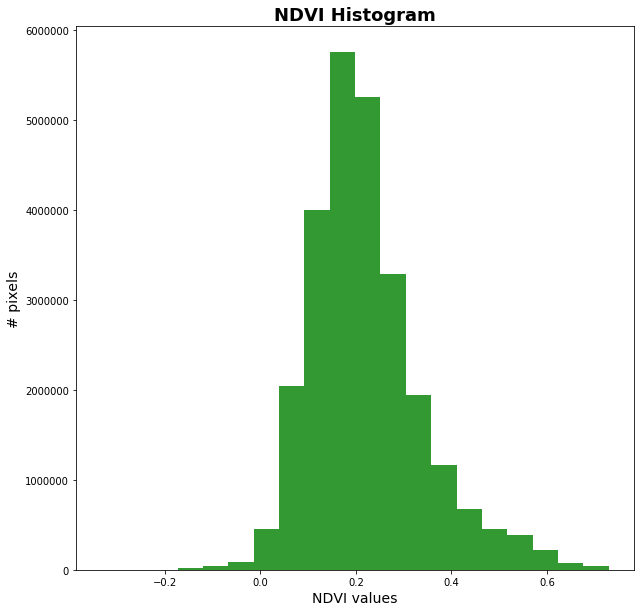

In [18]:
fig2 = plt.figure(figsize=(10,10))
ax = fig2.add_subplot(111)

plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
plt.xlabel("NDVI values", fontsize=14)
plt.ylabel("# pixels", fontsize=14)


x = ndvi[~np.isnan(ndvi)]
numBins = 20
ax.hist(x,numBins,color='green',alpha=0.8)

fig2.savefig("ndvi-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

plt.show()